# **Movie Genre Data Analysis**

# **Introduction**

We are going to focus highly on genre's. I want to know everything about Genre's.
Here are some things I want to Look at:

# **Research Questions (Q):**

1. Which genres are the most common (number of movies made)?

2. Which Genres have high avg. budget and revenue?

3. Which Genres have high avg. Profit?

4. Which genres have high avg. popularity?

5. Which genres have highest number of movies with a voting avg >= 8?

# Research Hypotheses (H):

1. The best movies according to vote avg. return high profit and revenue.

2. The best movies according to vote popularity return high profit and revenue.

3. Highly budgeted movies return high revenue and profit.

4. Highly budgetted movies have a high popularity.


In [128]:
# import the library
import pandas as pd

# Load the data
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Movie Genre Project/imdb_movies.csv')
movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100000,2015,137999939.280026,348161292.489031
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300000,2015,101199955.472019,271619025.407628
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500000,2015,183999919.040035,1902723129.801820
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300000,2015,174799923.088033,1385748801.470520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.400000,1966,0.000000,0.000000
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.700000,1966,0.000000,0.000000
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.500000,1966,0.000000,0.000000
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.400000,1966,0.000000,0.000000


In [129]:
# Get the detail about our dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [130]:
# Check for duplicates, delete duplicates
movies[movies.duplicated()]
movies.drop_duplicates(inplace = True)

In [131]:
# drop any row with null values based on genre column
movies.dropna(subset= ['genres'], inplace= True)

In [132]:
# create a new column calculating profit
movies['profit'] = movies['revenue'] - movies['budget']

In [133]:
# Keep the columns that we need for this project remove the rest.
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime','genres', 'release_date', 'vote_count', 'vote_average', 'profit']]

In [134]:
# Split the genres column up to get each genre
from pandas import Series, DataFrame

In [135]:
# Split the genres column with delimiter |, create a series out of its values, then stack them together.
split = movies_genre['genres'].str.split('|').apply(Series, 1).stack()
# split the index column and then drop it
split.index = split.index.droplevel(-1)
# name the new column to genres_split
split.name = 'genres_split'
# delete the genres column since we no longer need it.
del movies_genre['genres']
#
movies_genre = movies_genre.join(split)
movies_genre

<ipython-input-135-2549f75a0551>:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series, 1).stack()


,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.100000,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.500000,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.500000,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.400000,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.400000,0,Comedy


# Research Questions (Q)

1. Which genres are the most common (number of movies made)?



In [136]:
# Group movies by genre
genre_counts = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending = True)
genre_counts.tail(5)

,original_title
genres_split,
Romance,1686
Action,2339
Thriller,2841
Comedy,3750
Drama,4672


<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

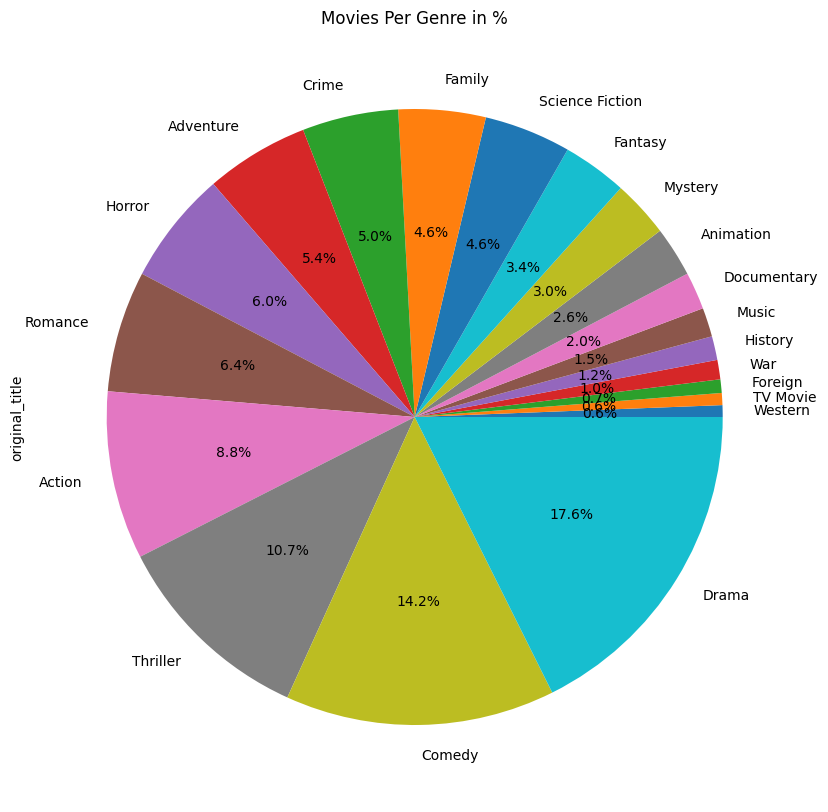

In [137]:
genre_counts['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct = '%1.1f%%', figsize = (10,10))

Drama, Comedy, Thriller, Action, and Romance are the most common genres respectively.

<Axes: title={'center': 'Movies Per Genre in Genre'}, ylabel='genres_split'>

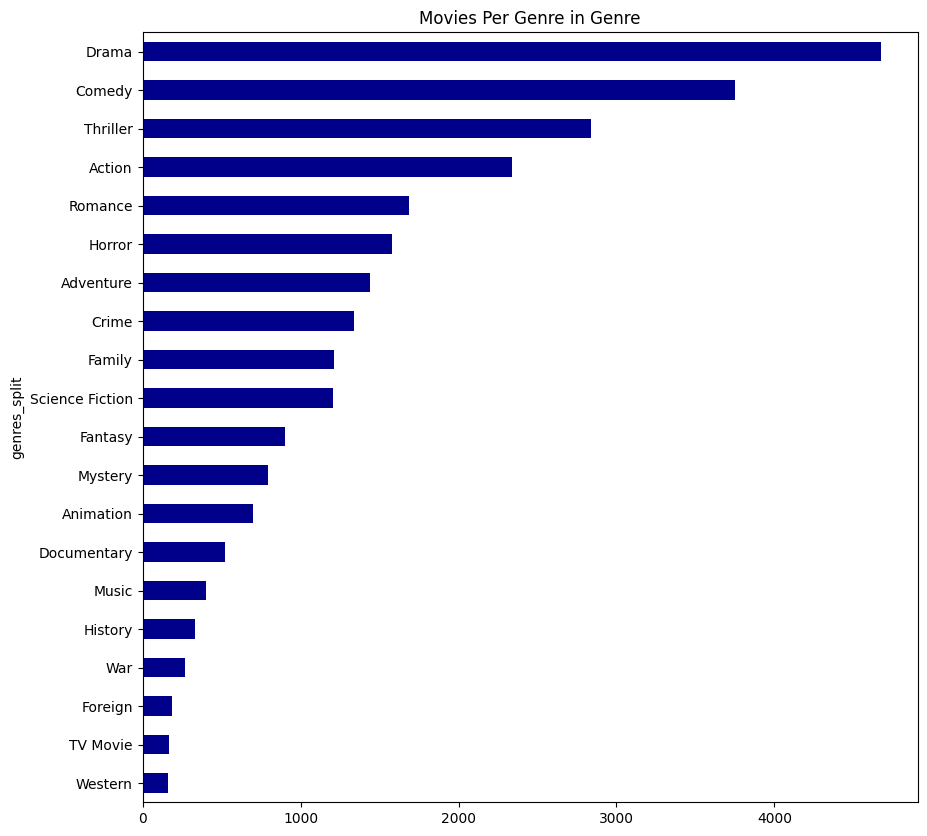

In [138]:
genre_counts['original_title'].plot.barh(title = 'Movies Per Genre in Genre', color = 'DarkBlue', figsize = (10,10))

2. Which Genres have high avg. budget and revenue?



In [139]:
genres_avg = movies_genre.groupby('genres_split').mean(numeric_only=True)
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,420.741266,5.863537,63701071.733624


In [140]:
genres_avg.sort_values('budget', ascending = True, inplace = True)

<Axes: title={'center': 'Revenue & budget by Genre'}, ylabel='genres_split'>

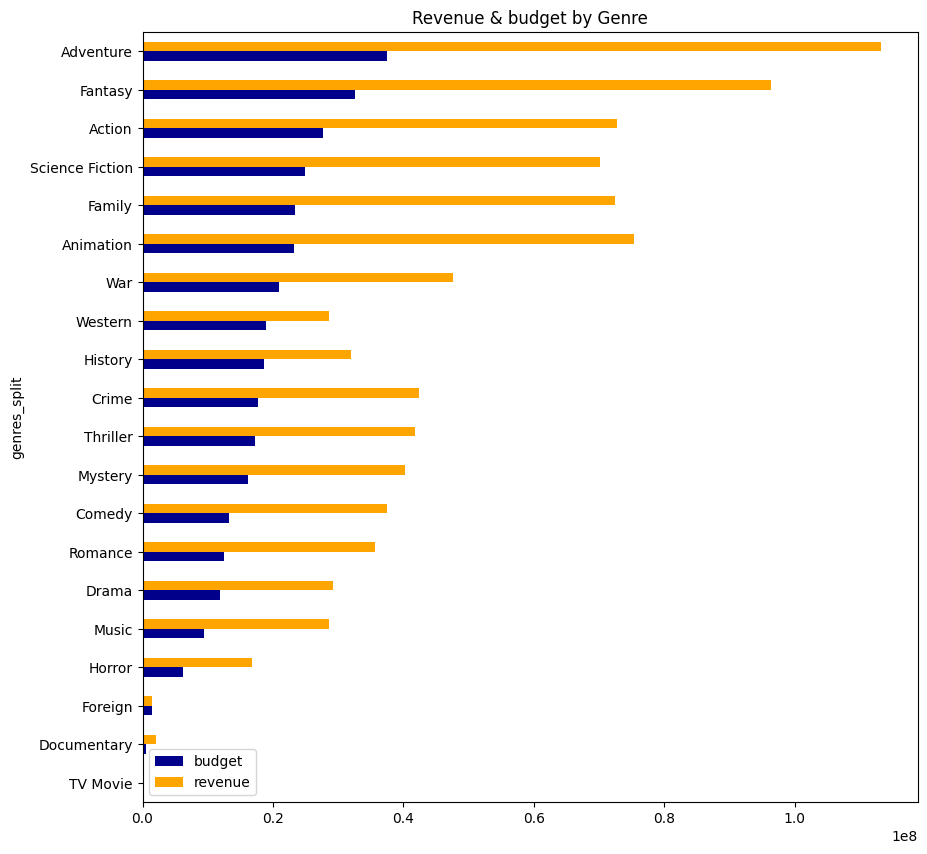

In [141]:
genres_avg[['budget', 'revenue']].plot.barh(title = 'Revenue & budget by Genre', color = ('DarkBlue', 'orange'), figsize = (10,10))

3. Which Genres have high avg. Profit?



In [142]:
genres_avg.sort_values('profit', ascending = True, inplace = True)

<Axes: title={'center': 'Profit by Genre'}, ylabel='genres_split'>

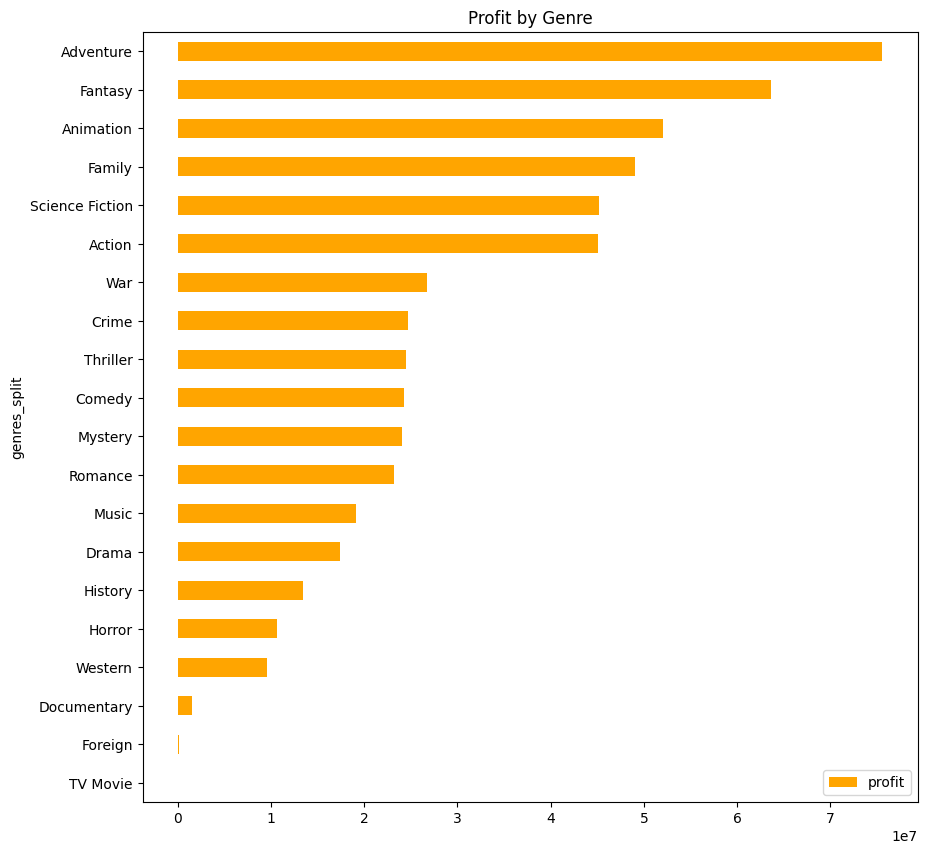

In [143]:
genres_avg[['profit']].plot.barh(title = 'Profit by Genre', color = ( 'orange'), figsize = (10,10))

4. Which genres have high avg. popularity?



In [144]:
genres_avg.sort_values('popularity', ascending = True, inplace = True)

<Axes: title={'center': 'Popularity by Genre'}, ylabel='genres_split'>

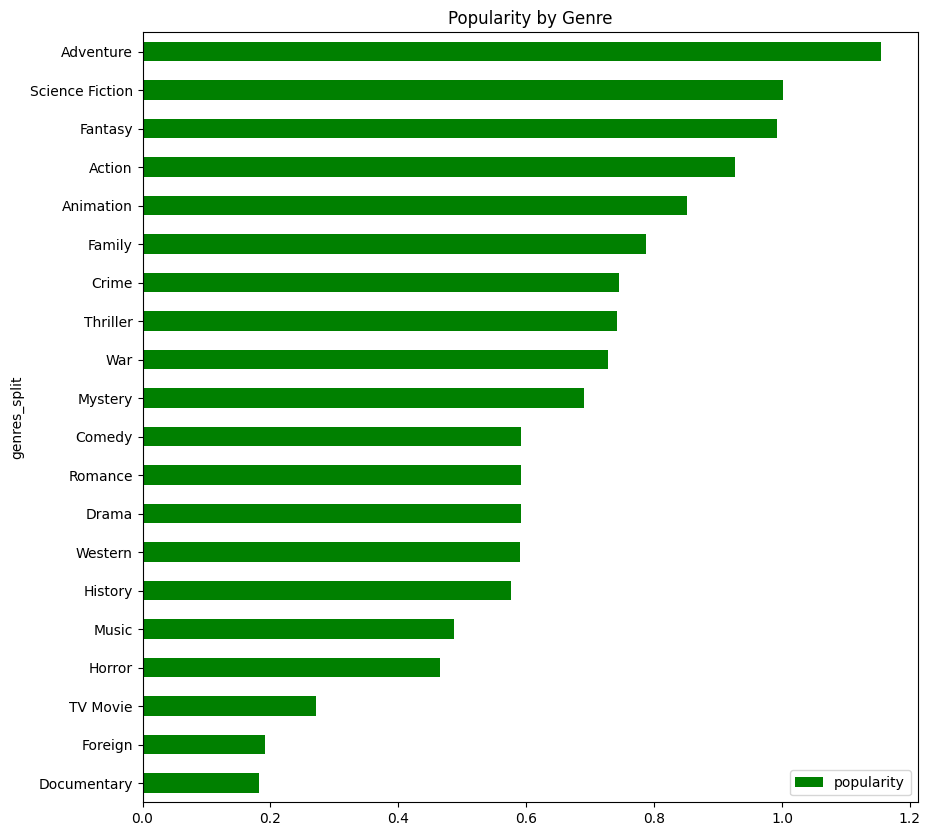

In [145]:
genres_avg[['popularity']].plot.barh(title = 'Popularity by Genre', color = ( 'green'), figsize = (10,10))

5. Which genres have highest number of movies with a voting avg >= 8?

In [146]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.100000,228436354,Action


In [147]:
vote_fifty = movies_genre[(movies_genre['vote_count']>= 50) & (movies_genre['vote_average']>= 8)]
vote_fifty

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
9,6.326804,175000000,853708609,Inside Out,94,6/9/15,3935,8.000000,678708609,Comedy
9,6.326804,175000000,853708609,Inside Out,94,6/9/15,3935,8.000000,678708609,Animation
9,6.326804,175000000,853708609,Inside Out,94,6/9/15,3935,8.000000,678708609,Family
35,3.557846,6000000,35401758,Room,117,10/16/15,1520,8.000000,29401758,Drama
35,3.557846,6000000,35401758,Room,117,10/16/15,1520,8.000000,29401758,Thriller
...,...,...,...,...,...,...,...,...,...,...
10141,2.610362,806948,32000000,Psycho,109,8/14/60,1180,8.000000,31193052,Horror
10141,2.610362,806948,32000000,Psycho,109,8/14/60,1180,8.000000,31193052,Thriller
10222,2.377288,22000000,321265768,Schindler's List,195,11/29/93,2632,8.100000,299265768,Drama
10222,2.377288,22000000,321265768,Schindler's List,195,11/29/93,2632,8.100000,299265768,History


In [148]:
genres_vote = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)


In [149]:
genres_vote

,vote_average
genres_split,
Fantasy,1
Science Fiction,1
Animation,1
Mystery,1
Horror,1
Family,1
Romance,2
Music,2
History,2


<Axes: title={'center': 'Vote Average by Genre'}, ylabel='genres_split'>

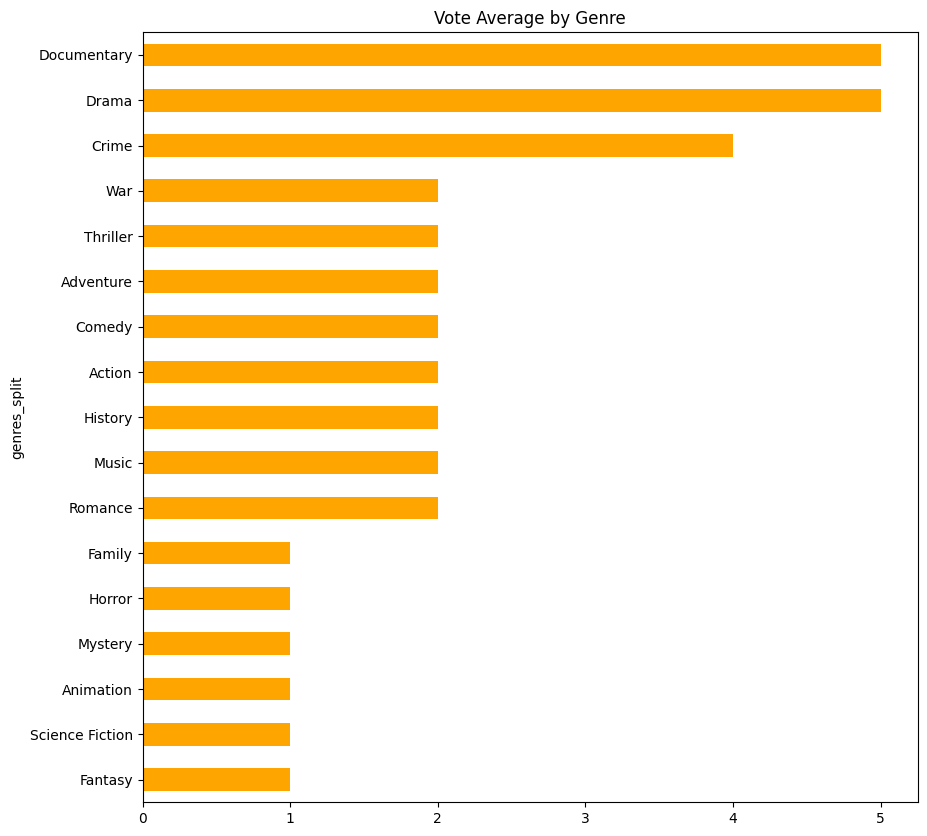

In [150]:
genres_vote['vote_average'].plot.barh(title = 'Vote Average by Genre', color = 'orange', figsize = (10,10))

Research Hypotheses (H):
# New Section

1. The best movies according to vote avg. return high profit and revenue.

In [155]:
import numpy as np
# Building the dataset for hypothesis
movies.drop_duplicates(inplace = True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity', 'budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'profit']]

In [156]:
movies_counted = movies_genre[movies_genre['vote_count'] >= 50]

movies_counted.corr(method = 'spearman')

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.484952,0.588594,0.230214,0.768888,0.189226,0.498092
budget,0.484952,1.000000,0.714733,0.360001,0.554412,-0.044050,0.334345
revenue,0.588594,0.714733,1.000000,0.341469,0.682550,0.112201,0.842278
runtime,0.230214,0.360001,0.341469,1.000000,0.263164,0.286082,0.211947
vote_count,0.768888,0.554412,0.682550,0.263164,1.000000,0.285084,0.583606
vote_average,0.189226,-0.044050,0.112201,0.286082,0.285084,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


2. The best movies according to vote popularity return high profit and revenue.

<Axes: xlabel='vote_average', ylabel='profit'>

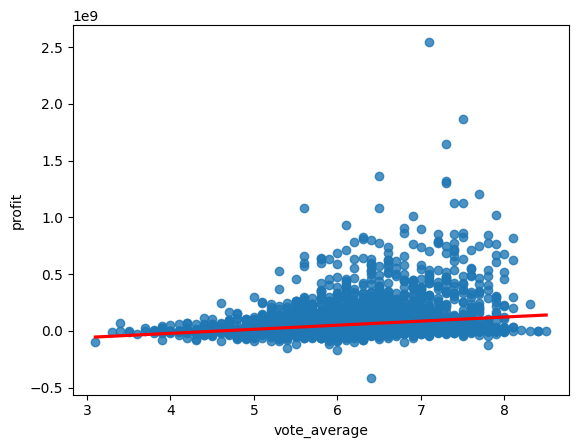

In [158]:
import seaborn as sns

sns.regplot(x = 'vote_average', y = 'profit', data = movies_counted, line_kws={"color": 'red'})

<Axes: xlabel='vote_average', ylabel='revenue'>

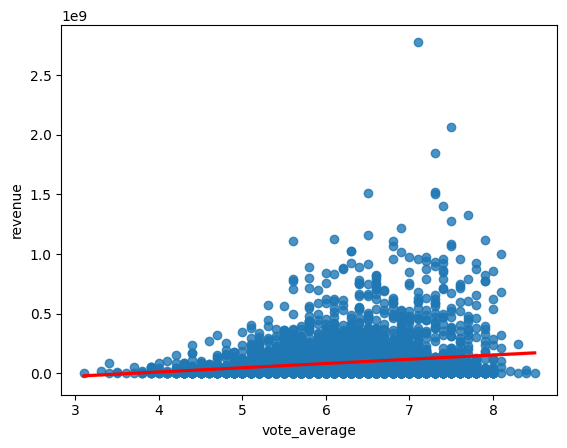

In [159]:
sns.regplot(x = 'vote_average', y = 'revenue', data = movies_counted, line_kws={"color": 'red'})

3. Highly budgeted movies return high revenue and profit.

<Axes: xlabel='popularity', ylabel='profit'>

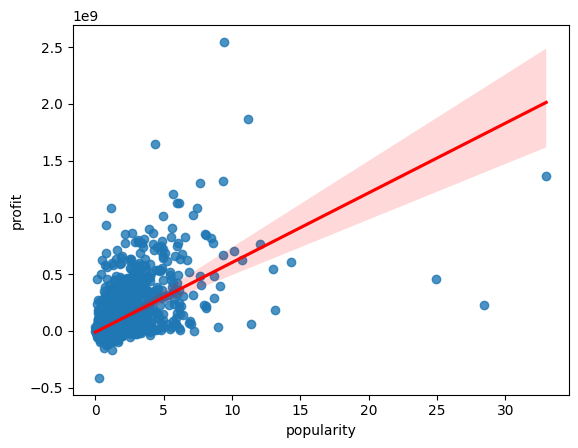

In [160]:
sns.regplot(x = 'popularity', y = 'profit', data = movies_counted, line_kws={"color": 'red'})

<Axes: xlabel='vote_average', ylabel='revenue'>

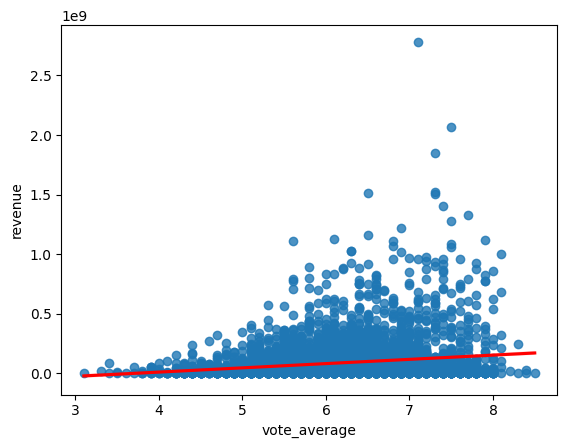

In [161]:
sns.regplot(x = 'vote_average', y = 'revenue', data = movies_counted, line_kws={"color": 'red'})

4. Highly budgetted movies have a high popularity.

<Axes: xlabel='budget', ylabel='popularity'>

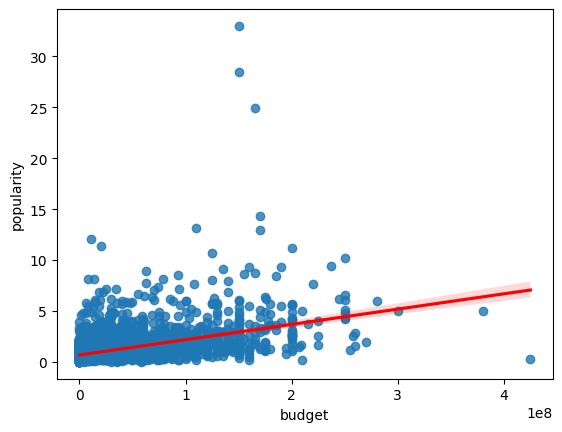

In [163]:
sns.regplot(x = 'budget', y = 'popularity', data = movies_counted, line_kws={"color": 'red'})